In [ ]:
!pip install torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html
!pip install numpy==1.17
!pip install PyYAML==5.3.1
!pip install git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 704.4MB 24kB/s 
     |████████████████████████████████| 6.7MB 25.6MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.5.1+cu101 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling torchvision-0.9.1+cu101:
      Successfully uninstalled torchvision-0.9.1+cu101
     |████████████████████████████████| 20.3MB 1.2MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.5.1+cu101 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.17.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirem

     |████████████████████████████████| 276kB 7.8MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44620 sha256=e5eb272d3d2b6bbf203444249cae769091bbc990c1a10d05c2cf5ad76a035e4c
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built PyYAML
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-oq9d3ts3
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-oq9d3ts3
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=265063 sha256=dbb9070e35c6682cd3300d05a0bb6ba9a66f3f5f37422e3c113ebd71f6310d33
  Stored in directory: /tmp/pip-ephem-wheel-cache-uzvk9qkb/wheels/90/51/41/646daf401c3bc408ff10de34ec76587a9b3ebfac8d21ca5c3a
Successfully built pycocotools
  Found existing insta

### **Download and unzip data** 

In [ ]:
!wget https://www.dropbox.com/s/455hyl1dks05lqk/mask_data.zip
!unzip -o mask_data.zip

--2021-03-31 20:24:15--  https://www.dropbox.com/s/455hyl1dks05lqk/mask_data.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:601a:18::a27d:712
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/455hyl1dks05lqk/mask_data.zip [following]
--2021-03-31 20:24:15--  https://www.dropbox.com/s/raw/455hyl1dks05lqk/mask_data.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf6c8a369335a8d3e53e459956d.dl.dropboxusercontent.com/cd/0/inline/BLuwtoQlu2URrZWc3rB6A8mEurUPbRnuLqh-nXP9jufGfW5jd6XhmKyCEtaPc3mV2FP9WzsZSwLQ2OrX-Wrj2ly7kOTAue5ttaPizKI9JilWeiBS_18Sz0KfX0uQUvxOCr5KLFcpMiizBpQxwxWRmcLm/file# [following]
--2021-03-31 20:24:15--  https://ucf6c8a369335a8d3e53e459956d.dl.dropboxusercontent.com/cd/0/inline/BLuwtoQlu2URrZWc3rB6A8mEurUPbRnuLqh-nXP9jufGfW5jd6XhmKyCEtaPc3mV2FP9WzsZSwLQ2OrX-Wrj2ly

## get imports 

In [ ]:

from pathlib import Path
from tqdm import tqdm
import numpy as np
import json
import urllib
import PIL.Image as Image
import cv2
import torch
import torchvision
from IPython.display import display
from sklearn.model_selection import train_test_split
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import os
import xml.etree.ElementTree as ET
import cv2
import random
!pip install xmltodict
import xmltodict, json
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
rcParams['figure.figsize'] = 16, 10
np.random.seed(42)

## Util Functions 

In [ ]:
def xml_reader(img_dir, xml_dir):

  # create return array
  bndbox = []
  obj_name = []

  #first path join img directory and xml directory
  #from step two we can see image directory save as .png, xml directory save as .xml
  #here to join them we need to remove last three character from image directory and add xml to match 
  print(img_dir)            # /content/annotations
  print(img_dir[:-3])       # tensor([], device='cuda:0', size=(0, 366, 512))
  print(type(img_dir[:-3])) # <class 'torch.Tensor'>
  join_path = os.path.join(xml_dir, img_dir[:-3]+'xml')

  #find the root of the xml tree
  root = ET.parse(join_path).getroot()

  #write a loop to find all face boxes inside a xml file
  #both obj_name and bndbox data are under annotation - object 
  for face_box in root.iter('object'):
    #find xmin, ymin, xmax, ymax
    xmin = int(face_box.find("bndbox/xmin").text)
    ymin = int(face_box.find("bndbox/ymin").text)
    xmax = int(face_box.find("bndbox/xmax").text)
    ymax = int(face_box.find("bndbox/ymax").text)
    #append them into bndbox[]
    bndbox.append([xmin, ymin, xmax, ymax])

    #find name (with_mask, mask_weared_incorrect, without_mask)
    name = face_box.find('name').text
    #due to we do not want with_mask, mask_weared_incorrect, without_mask
    #so we trans them to 1 => with_mask, 2 => mask_weared_incorrect, 3 => without_mask
    if name == 'with_mask':
      obj_name.append(1)
    elif name == 'mask_weared_incorrect':
      obj_name.append(2)
    else:
      obj_name.append(3)

  #return bndbox and obj_name
  return bndbox, obj_name

def draw_box(image, bndbox, obj_name):
  
  #Convert BGR and RGB with OpenCV function
  image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

  #Use OpenCV add rectangle
  for box, name in zip(bndbox, obj_name):
    #box is a len 4 array
    box = [int(x) for x in box]
    #set the block green for with_mask, yellow for mask_weared_incorrect, red for without_mask
    #here is BGR value
    if name == 1:
      color = (0, 255, 0) #green
    elif name == 2:
      color = (0, 255, 255) #yellow
    elif name == 3:
      color = (0, 0, 255) #red
    #draw the rectangle
    cv2.rectangle(image, (box[0],box[1]),(box[2],box[3]),color,1)

  #return new image
  return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

## View the images data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Here have 853 images, and 853 xml files
['maksssksksss398.png', 'maksssksksss105.png', 'maksssksksss200.png', 'maksssksksss828.png', 'maksssksksss444.png', 'maksssksksss254.png', 'maksssksksss321.png', 'maksssksksss45.png', 'maksssksksss303.png', 'maksssksksss420.png', 'maksssksksss790.png', 'maksssksksss307.png', 'maksssksksss578.png', 'maksssksksss573.png', 'maksssksksss205.png', 'maksssksksss247.png', 'maksssksksss389.png', 'maksssksksss788.png', 'maksssksksss158.png', 'maksssksksss710.png', 'maksssksksss68.png', 'maksssksksss821.png', 'maksssksksss479.png', 'maksssksksss544.png', 'maksssksksss363.png', 'maksssksksss42.png', 'maksssksksss665.png', 'maksssksksss711.png', 'maksssksksss455.png', 'maksssksksss660.png', 'maksssksksss292.png', 'maksssksksss384.png', 'maksssksksss815.png', 'maksssksksss36.png', 'maksssksksss54.png', 'maksssksksss650.png', 'maksssksksss680.png', 'maksssksksss673.png', 'maksssksksss826.png', 'maksssksksss131.png', 'maksssksksss600.png', 'maksssksksss567.png'

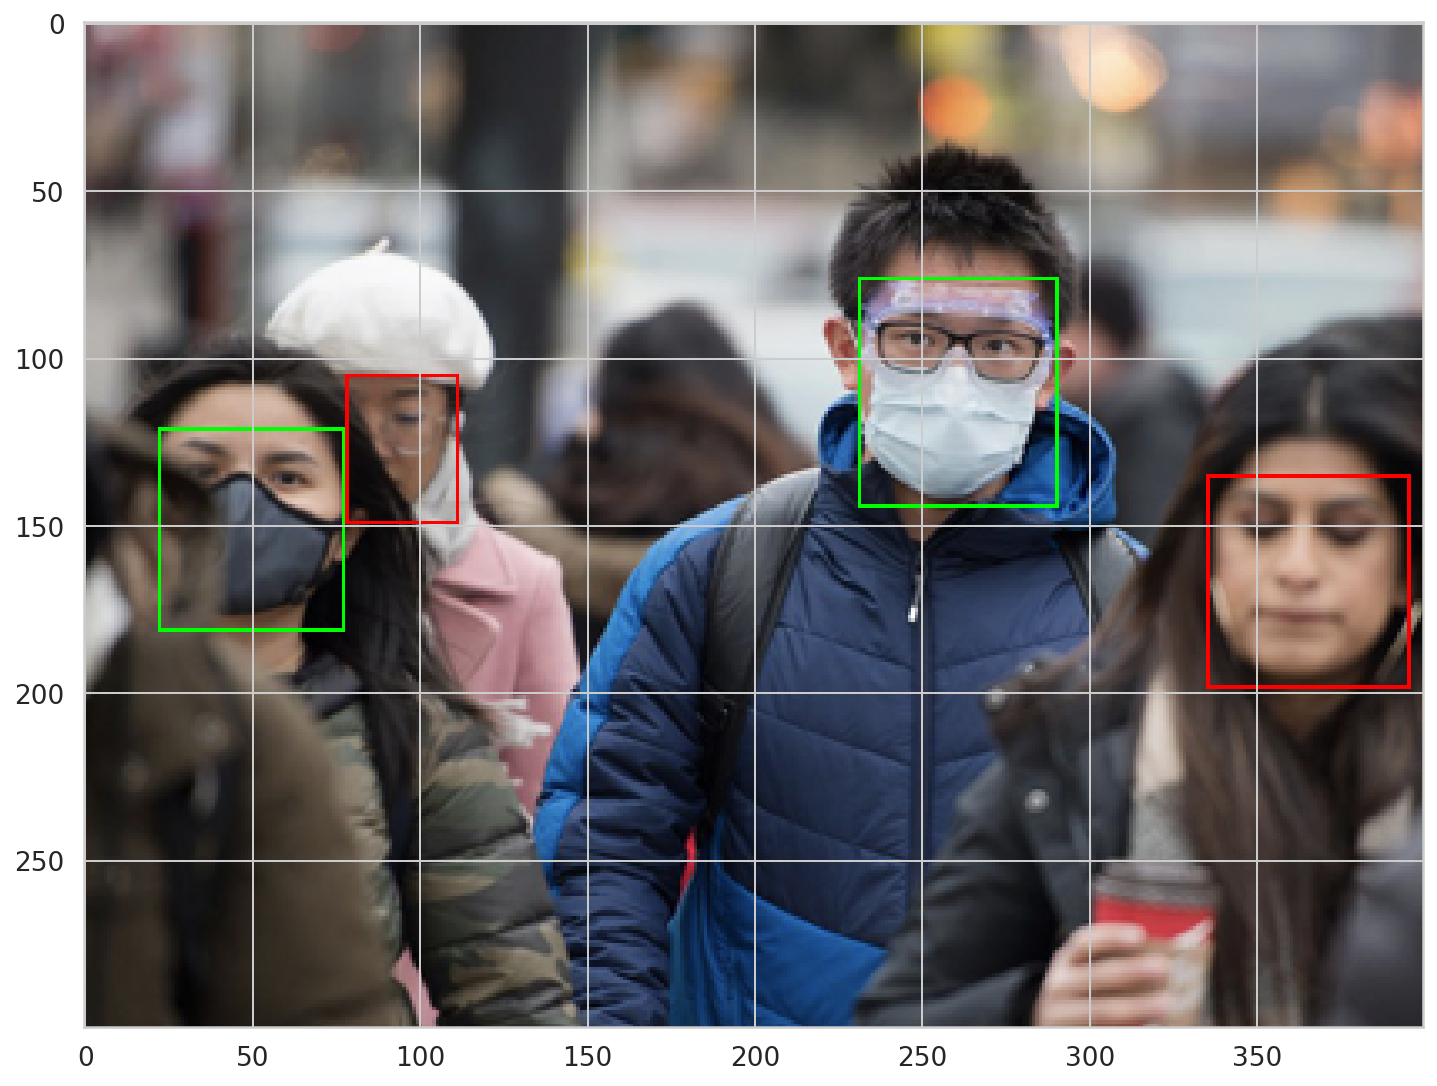

In [ ]:

img_path = '/content/images'
xml_path = '/content/annotations'
img_list = os.listdir(img_path);
xml_list = os.listdir(xml_path);

#print the number of image and xml files
print('Here have ' + format(len(img_list)) + ' images, and ' + format(len(xml_list)) + ' xml files')

#print image name
print (img_list)

#print xml name
print (xml_list)


# Get image randomly in the list
random_image = img_list[random.randint(0,853)]
print('Random image is: ' + random_image)

#get bndbox and obj_name
bndbox, obj_name = xml_reader(random_image, xml_path)
print('bndbox: ' + format(bndbox))
print('obj_name: ' + format(obj_name))

#use openCV draw box
image_with_box = draw_box(plt.imread(os.path.join(img_path,random_image)), bndbox, obj_name)

#plot the image
plt.figure(figsize=(12,12))
plt.imshow(image_with_box)


## Split train test data

### convert anotation to yolo format, prepare train test data 

In [ ]:
# create a list of all json anotaions
masks = []
for xml in xml_list:
  with open(os.path.join(xml_path,xml)) as fd:
    doc = fd.read()
    masks.append(json.dumps(xmltodict.parse(doc)))
train_mask, val_mask = train_test_split(masks, test_size=0.1)
print(masks)

# yolo format converter
# fomula source https://stackoverflow.com/questions/56115874/how-to-convert-bounding-box-x1-y1-x2-y2-to-yolo-style-x-y-w-h

def conver_to_yolo(label):
  category_idx = categories.index(label['name'])
  print(label, type(label))
  xmin, ymin = int(label['bndbox']['xmin']), int(label['bndbox']['ymin'])
  xmax, ymax = int(label['bndbox']['xmax']), int(label['bndbox']['ymax'])
  x = (xmin+xmax)/2
  y = (ymin+ymax)/2
  w = xmax-xmin
  h = ymax-ymin
  return category_idx, x,y,h,w

def create_dataset(images, categories, group):
  # prepare anotation and images 
  images_path = Path(f"masks/images/{group}")
  images_path.mkdir(parents=True, exist_ok=True)
  labels_path = Path(f"masks/labels/{group}")
  labels_path.mkdir(parents=True, exist_ok=True)

  for img_id, row in enumerate(tqdm(images)):
    image_name = f"{img_id}.jpeg"
    row = json.loads(row)
    image_file_name = row["annotation"]["filename"]
    img =  os.path.join(img_path,image_file_name)
    img = Image.open(img)
    img = img.convert("RGB")
    img.save(str(images_path / image_name), "JPEG")
    
    label_name = f"{img_id}.txt"
    with (labels_path / label_name).open(mode="w") as label_file:
      a = row["annotation"]
      w = float(a['size']['width'])
      h = float(a['size']['height'])
      dw = 1./w
      dh = 1./h
      if isinstance(a['object'], list):
        for label in a['object']:
          category_idx, x,y,h,w=conver_to_yolo(label)
          label_file.write(
          f"{category_idx} {x*dw} {y*dh} {w*dw} {h*dh}\n")
      else:
          category_idx, x,y,h,w=conver_to_yolo(a['object'])
          label_file.write(
          f"{category_idx} {x*dw} {y*dh} {w*dw} {h*dh}\n")


categories = ['mask_weared_incorrect','without_mask','with_mask']
create_dataset(train_mask, categories, 'train')
create_dataset(val_mask, categories, 'val')

  1%|          | 4/767 [00:00<00:20, 36.67it/s]

['{"annotation": {"folder": "images", "filename": "maksssksksss822.png", "size": {"width": "400", "height": "225", "depth": "3"}, "segmented": "0", "object": [{"name": "with_mask", "pose": "Unspecified", "truncated": "0", "occluded": "0", "difficult": "0", "bndbox": {"xmin": "7", "ymin": "59", "xmax": "20", "ymax": "78"}}, {"name": "with_mask", "pose": "Unspecified", "truncated": "0", "occluded": "0", "difficult": "0", "bndbox": {"xmin": "36", "ymin": "53", "xmax": "55", "ymax": "73"}}, {"name": "with_mask", "pose": "Unspecified", "truncated": "0", "occluded": "0", "difficult": "0", "bndbox": {"xmin": "97", "ymin": "133", "xmax": "111", "ymax": "147"}}, {"name": "with_mask", "pose": "Unspecified", "truncated": "0", "occluded": "0", "difficult": "0", "bndbox": {"xmin": "115", "ymin": "90", "xmax": "130", "ymax": "108"}}, {"name": "with_mask", "pose": "Unspecified", "truncated": "0", "occluded": "0", "difficult": "0", "bndbox": {"xmin": "133", "ymin": "75", "xmax": "147", "ymax": "89"}},

  2%|▏         | 14/767 [00:00<00:19, 39.44it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '113', 'ymin': '61', 'xmax': '174', 'ymax': '122'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '195', 'ymin': '50', 'xmax': '228', 'ymax': '112'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '314', 'ymin': '63', 'xmax': '338', 'ymax': '92'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '184', 'ymin': '42', 'xmax': '213', 'ymax': '72'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '275', 'ymin': '65', 'xmax': '296', 'ymax': '91'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'di

  3%|▎         | 21/767 [00:00<00:21, 35.21it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '22', 'ymin': '128', 'xmax': '67', 'ymax': '174'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '58', 'ymin': '192', 'xmax': '107', 'ymax': '245'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '114', 'ymin': '113', 'xmax': '140', 'ymax': '141'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '86', 'ymin': '119', 'xmax': '106', 'ymax': '137'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '113', 'ymin': '83', 'xmax': '132', 'ymax': '103'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 

  4%|▍         | 29/767 [00:00<00:23, 32.02it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '93', 'ymin': '60', 'xmax': '153', 'ymax': '124'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '71', 'ymin': '53', 'xmax': '104', 'ymax': '88'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '174', 'ymin': '32', 'xmax': '204', 'ymax': '70'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '291', 'ymin': '80', 'xmax': '340', 'ymax': '134'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '79', 'ymin': '174', 'xmax': '126', 'ymax': '226'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'dif

  5%|▌         | 40/767 [00:01<00:18, 38.96it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '1', 'ymin': '132', 'xmax': '59', 'ymax': '215'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '139', 'ymin': '128', 'xmax': '224', 'ymax': '210'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '331', 'ymin': '205', 'xmax': '400', 'ymax': '277'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '47', 'ymin': '210', 'xmax': '157', 'ymax': '359'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '17', 'ymin': '182', 'xmax': '35', 'ymax': '202'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', '

  7%|▋         | 51/767 [00:01<00:16, 42.86it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '352', 'ymin': '102', 'xmax': '370', 'ymax': '123'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '272', 'ymin': '33', 'xmax': '289', 'ymax': '51'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '188', 'ymin': '124', 'xmax': '206', 'ymax': '143'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '20', 'ymin': '54', 'xmax': '41', 'ymax': '72'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '123', 'ymin': '68', 'xmax': '141', 'ymax': '87'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'di

  8%|▊         | 61/767 [00:01<00:16, 41.85it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '218', 'ymin': '57', 'xmax': '307', 'ymax': '164'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '26', 'ymin': '58', 'xmax': '40', 'ymax': '74'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '61', 'ymin': '58', 'xmax': '77', 'ymax': '77'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '84', 'ymin': '48', 'xmax': '95', 'ymax': '59'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '94', 'ymin': '35', 'xmax': '110', 'ymax': '50'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'd

  9%|▉         | 71/767 [00:01<00:16, 42.03it/s]

{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '53', 'ymin': '108', 'xmax': '96', 'ymax': '149'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '171', 'ymin': '70', 'xmax': '225', 'ymax': '130'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '315', 'ymin': '34', 'xmax': '400', 'ymax': '130'}} <class 'dict'>
{'name': 'mask_weared_incorrect', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '48', 'ymin': '107', 'xmax': '218', 'ymax': '304'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '36', 'ymin': '102', 'xmax': '157', 'ymax': '243'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 

 10%|▉         | 76/767 [00:01<00:16, 41.55it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '100', 'ymin': '105', 'xmax': '152', 'ymax': '158'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '80', 'ymin': '61', 'xmax': '116', 'ymax': '100'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '228', 'ymin': '42', 'xmax': '260', 'ymax': '80'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '304', 'ymin': '47', 'xmax': '339', 'ymax': '84'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '135', 'ymin': '69', 'xmax': '156', 'ymax': '90'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0

 11%|█         | 86/767 [00:02<00:17, 39.17it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '187', 'ymin': '83', 'xmax': '212', 'ymax': '109'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '66', 'ymin': '99', 'xmax': '209', 'ymax': '235'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '82', 'ymin': '75', 'xmax': '122', 'ymax': '119'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '171', 'ymin': '67', 'xmax': '206', 'ymax': '108'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '270', 'ymin': '35', 'xmax': '318', 'ymax': '83'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'di

 13%|█▎        | 96/767 [00:02<00:16, 40.72it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '124', 'ymin': '110', 'xmax': '184', 'ymax': '173'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '272', 'ymin': '117', 'xmax': '320', 'ymax': '163'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '24', 'ymin': '60', 'xmax': '44', 'ymax': '83'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '58', 'ymin': '75', 'xmax': '76', 'ymax': '95'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '130', 'ymin': '67', 'xmax': '152', 'ymax': '92'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'diff

 14%|█▍        | 106/767 [00:02<00:16, 41.25it/s]

{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '163', 'ymin': '164', 'xmax': '269', 'ymax': '299'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '353', 'ymin': '17', 'xmax': '381', 'ymax': '51'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '210', 'ymin': '40', 'xmax': '238', 'ymax': '68'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '17', 'ymin': '72', 'xmax': '41', 'ymax': '97'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '105', 'ymin': '61', 'xmax': '129', 'ymax': '86'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'd

 14%|█▍        | 111/767 [00:02<00:15, 41.65it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '44', 'ymin': '25', 'xmax': '95', 'ymax': '81'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '50', 'ymin': '121', 'xmax': '89', 'ymax': '158'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '41', 'ymin': '210', 'xmax': '88', 'ymax': '260'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '176', 'ymin': '29', 'xmax': '228', 'ymax': '85'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '175', 'ymin': '123', 'xmax': '225', 'ymax': '169'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'diff

 16%|█▌        | 121/767 [00:03<00:16, 39.15it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '23', 'ymin': '43', 'xmax': '59', 'ymax': '82'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '77', 'ymin': '20', 'xmax': '112', 'ymax': '61'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '139', 'ymin': '41', 'xmax': '163', 'ymax': '71'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '189', 'ymin': '71', 'xmax': '212', 'ymax': '98'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '323', 'ymin': '77', 'xmax': '335', 'ymax': '97'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficu

 17%|█▋        | 131/767 [00:03<00:15, 41.46it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '270', 'ymin': '98', 'xmax': '313', 'ymax': '142'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '189', 'ymin': '60', 'xmax': '228', 'ymax': '100'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '122', 'ymin': '73', 'xmax': '150', 'ymax': '100'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '6', 'ymin': '68', 'xmax': '41', 'ymax': '109'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '334', 'ymin': '92', 'xmax': '351', 'ymax': '110'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 

 18%|█▊        | 136/767 [00:03<00:15, 41.93it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '48', 'ymin': '52', 'xmax': '67', 'ymax': '70'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '95', 'ymin': '20', 'xmax': '109', 'ymax': '36'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '213', 'ymin': '29', 'xmax': '231', 'ymax': '50'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '354', 'ymin': '15', 'xmax': '375', 'ymax': '41'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '9', 'ymin': '31', 'xmax': '19', 'ymax': '45'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult'

 19%|█▉        | 146/767 [00:03<00:15, 39.38it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '221', 'ymin': '82', 'xmax': '297', 'ymax': '163'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '49', 'ymin': '146', 'xmax': '102', 'ymax': '201'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '26', 'ymin': '82', 'xmax': '70', 'ymax': '122'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '73', 'ymin': '48', 'xmax': '102', 'ymax': '78'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '137', 'ymin': '42', 'xmax': '163', 'ymax': '74'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'diff

 20%|██        | 156/767 [00:03<00:15, 39.76it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '86', 'ymin': '194', 'xmax': '195', 'ymax': '340'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '4', 'ymin': '106', 'xmax': '42', 'ymax': '163'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '41', 'ymin': '114', 'xmax': '88', 'ymax': '163'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '101', 'ymin': '95', 'xmax': '143', 'ymax': '146'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '102', 'ymin': '17', 'xmax': '144', 'ymax': '58'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', '

 22%|██▏       | 166/767 [00:04<00:13, 42.96it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '64', 'ymin': '129', 'xmax': '110', 'ymax': '174'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '166', 'ymin': '136', 'xmax': '222', 'ymax': '196'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '383', 'ymin': '126', 'xmax': '430', 'ymax': '184'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '66', 'ymin': '25', 'xmax': '82', 'ymax': '48'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '101', 'ymin': '41', 'xmax': '124', 'ymax': '68'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'd

 23%|██▎       | 178/767 [00:04<00:12, 47.41it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '282', 'ymin': '39', 'xmax': '321', 'ymax': '84'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '230', 'ymin': '34', 'xmax': '264', 'ymax': '69'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '194', 'ymin': '60', 'xmax': '232', 'ymax': '101'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '99', 'ymin': '50', 'xmax': '150', 'ymax': '99'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '94', 'ymin': '198', 'xmax': '189', 'ymax': '327'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'dif

 25%|██▍       | 188/767 [00:04<00:12, 46.32it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '161', 'ymin': '23', 'xmax': '185', 'ymax': '45'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '225', 'ymin': '18', 'xmax': '247', 'ymax': '42'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '197', 'ymin': '75', 'xmax': '216', 'ymax': '100'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '272', 'ymin': '114', 'xmax': '295', 'ymax': '138'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '142', 'ymin': '280', 'xmax': '225', 'ymax': '387'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 

 26%|██▌       | 198/767 [00:04<00:12, 44.74it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '25', 'ymin': '69', 'xmax': '48', 'ymax': '93'}} <class 'dict'>
{'name': 'mask_weared_incorrect', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '88', 'ymin': '87', 'xmax': '107', 'ymax': '106'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '128', 'ymin': '61', 'xmax': '149', 'ymax': '84'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '127', 'ymin': '157', 'xmax': '168', 'ymax': '209'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '147', 'ymin': '110', 'xmax': '181', 'ymax': '145'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occlude

 26%|██▋       | 203/767 [00:04<00:13, 42.85it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '328', 'ymin': '33', 'xmax': '350', 'ymax': '57'}} <class 'dict'>
{'name': 'mask_weared_incorrect', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '366', 'ymin': '70', 'xmax': '384', 'ymax': '92'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '249', 'ymin': '44', 'xmax': '268', 'ymax': '63'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '278', 'ymin': '71', 'xmax': '292', 'ymax': '87'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '29', 'ymin': '47', 'xmax': '46', 'ymax': '67'}} <class 'dict'>
{'name': 'mask_weared_incorrect', 'pose': 'Unspecified', 'truncated': '0', 

 28%|██▊       | 213/767 [00:05<00:12, 42.66it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '133', 'ymin': '108', 'xmax': '148', 'ymax': '124'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '203', 'ymin': '117', 'xmax': '214', 'ymax': '131'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '294', 'ymin': '115', 'xmax': '308', 'ymax': '130'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '228', 'ymin': '119', 'xmax': '241', 'ymax': '134'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '168', 'ymin': '65', 'xmax': '234', 'ymax': '139'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occlud

 29%|██▉       | 223/767 [00:05<00:12, 44.59it/s]

{'name': 'mask_weared_incorrect', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '111', 'ymin': '40', 'xmax': '151', 'ymax': '77'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '188', 'ymin': '51', 'xmax': '211', 'ymax': '76'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '41', 'ymin': '54', 'xmax': '64', 'ymax': '78'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '40', 'ymin': '137', 'xmax': '109', 'ymax': '218'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '54', 'ymin': '57', 'xmax': '111', 'ymax': '112'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded':

 30%|███       | 233/767 [00:05<00:12, 44.43it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '3', 'ymin': '49', 'xmax': '16', 'ymax': '64'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '42', 'ymin': '11', 'xmax': '66', 'ymax': '40'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '100', 'ymin': '66', 'xmax': '109', 'ymax': '82'}} <class 'dict'>
{'name': 'mask_weared_incorrect', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '144', 'ymin': '68', 'xmax': '155', 'ymax': '81'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '157', 'ymin': '24', 'xmax': '170', 'ymax': '45'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0'

 32%|███▏      | 243/767 [00:05<00:12, 40.68it/s]

<class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '239', 'ymin': '40', 'xmax': '256', 'ymax': '58'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '143', 'ymin': '60', 'xmax': '168', 'ymax': '89'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '275', 'ymin': '52', 'xmax': '299', 'ymax': '80'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '96', 'ymin': '87', 'xmax': '216', 'ymax': '214'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '15', 'ymin': '101', 'xmax': '23', 'ymax': '111'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occlud

 32%|███▏      | 248/767 [00:05<00:13, 39.53it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '56', 'ymin': '241', 'xmax': '145', 'ymax': '334'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '8', 'ymin': '15', 'xmax': '36', 'ymax': '45'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '53', 'ymin': '19', 'xmax': '86', 'ymax': '50'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '59', 'ymin': '77', 'xmax': '94', 'ymax': '111'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '27', 'ymin': '155', 'xmax': '58', 'ymax': '186'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult

 34%|███▎      | 258/767 [00:06<00:12, 40.80it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '21', 'ymin': '54', 'xmax': '90', 'ymax': '119'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '165', 'ymin': '18', 'xmax': '194', 'ymax': '47'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '145', 'ymin': '89', 'xmax': '195', 'ymax': '139'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '110', 'ymin': '218', 'xmax': '233', 'ymax': '267'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '275', 'ymin': '88', 'xmax': '320', 'ymax': '136'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'd

 35%|███▌      | 269/767 [00:06<00:11, 43.21it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '113', 'ymin': '230', 'xmax': '216', 'ymax': '368'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '139', 'ymin': '94', 'xmax': '198', 'ymax': '147'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '92', 'ymin': '86', 'xmax': '132', 'ymax': '125'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '48', 'ymin': '33', 'xmax': '81', 'ymax': '71'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '158', 'ymin': '86', 'xmax': '182', 'ymax': '108'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 

 37%|███▋      | 280/767 [00:06<00:10, 44.74it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '99', 'ymin': '44', 'xmax': '116', 'ymax': '64'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '151', 'ymin': '41', 'xmax': '171', 'ymax': '61'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '306', 'ymin': '21', 'xmax': '326', 'ymax': '42'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '354', 'ymin': '32', 'xmax': '357', 'ymax': '38'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '275', 'ymin': '32', 'xmax': '277', 'ymax': '35'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'di

 38%|███▊      | 290/767 [00:06<00:10, 44.94it/s]


{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '111', 'ymin': '38', 'xmax': '127', 'ymax': '56'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '145', 'ymin': '39', 'xmax': '170', 'ymax': '67'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '195', 'ymin': '22', 'xmax': '216', 'ymax': '46'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '262', 'ymin': '60', 'xmax': '273', 'ymax': '70'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '311', 'ymin': '53', 'xmax': '319', 'ymax': '62'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'dif

 39%|███▉      | 300/767 [00:07<00:10, 44.53it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '138', 'ymin': '66', 'xmax': '171', 'ymax': '99'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '267', 'ymin': '59', 'xmax': '299', 'ymax': '86'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '322', 'ymin': '76', 'xmax': '342', 'ymax': '100'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '352', 'ymin': '62', 'xmax': '380', 'ymax': '94'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '377', 'ymin': '83', 'xmax': '394', 'ymax': '102'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 

 40%|███▉      | 305/767 [00:07<00:10, 44.40it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '80', 'ymin': '40', 'xmax': '90', 'ymax': '50'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '96', 'ymin': '14', 'xmax': '110', 'ymax': '27'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '236', 'ymin': '25', 'xmax': '261', 'ymax': '50'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '318', 'ymin': '94', 'xmax': '342', 'ymax': '115'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '143', 'ymin': '92', 'xmax': '166', 'ymax': '119'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'diffi

 41%|████      | 316/767 [00:07<00:10, 42.96it/s]

{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '101', 'ymin': '49', 'xmax': '134', 'ymax': '91'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '133', 'ymin': '75', 'xmax': '166', 'ymax': '111'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '228', 'ymin': '102', 'xmax': '263', 'ymax': '148'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '346', 'ymin': '62', 'xmax': '367', 'ymax': '101'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '21', 'ymin': '98', 'xmax': '43', 'ymax': '120'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded'

 43%|████▎     | 326/767 [00:07<00:11, 39.19it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '68', 'ymin': '42', 'xmax': '105', 'ymax': '69'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '154', 'ymin': '47', 'xmax': '178', 'ymax': '74'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '238', 'ymin': '34', 'xmax': '262', 'ymax': '69'}} <class 'dict'>
{'name': 'mask_weared_incorrect', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '333', 'ymin': '31', 'xmax': '366', 'ymax': '65'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '305', 'ymin': '93', 'xmax': '334', 'ymax': '135'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded'

 44%|████▍     | 336/767 [00:08<00:10, 41.29it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '93', 'ymin': '44', 'xmax': '150', 'ymax': '100'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '87', 'ymin': '117', 'xmax': '136', 'ymax': '171'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '165', 'ymin': '95', 'xmax': '214', 'ymax': '148'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '281', 'ymin': '84', 'xmax': '331', 'ymax': '135'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '101', 'ymin': '197', 'xmax': '180', 'ymax': '306'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 

 45%|████▌     | 346/767 [00:08<00:09, 42.34it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '130', 'ymin': '19', 'xmax': '155', 'ymax': '47'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '212', 'ymin': '56', 'xmax': '232', 'ymax': '79'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '298', 'ymin': '60', 'xmax': '316', 'ymax': '80'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '134', 'ymin': '184', 'xmax': '223', 'ymax': '296'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '209', 'ymin': '90', 'xmax': '278', 'ymax': '165'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0',

 46%|████▌     | 351/767 [00:08<00:10, 39.41it/s]

{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '8', 'ymin': '1', 'xmax': '31', 'ymax': '23'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '9', 'ymin': '91', 'xmax': '31', 'ymax': '119'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '86', 'ymin': '68', 'xmax': '110', 'ymax': '92'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '101', 'ymin': '7', 'xmax': '126', 'ymax': '34'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '15', 'ymin': '129', 'xmax': '35', 'ymax': '155'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'diffic

 47%|████▋     | 362/767 [00:08<00:09, 43.79it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '17', 'ymin': '85', 'xmax': '59', 'ymax': '129'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '67', 'ymin': '94', 'xmax': '96', 'ymax': '125'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '96', 'ymin': '167', 'xmax': '139', 'ymax': '208'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '174', 'ymin': '91', 'xmax': '207', 'ymax': '128'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '212', 'ymin': '69', 'xmax': '238', 'ymax': '100'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': 

 49%|████▊     | 372/767 [00:08<00:08, 44.44it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '71', 'ymin': '82', 'xmax': '151', 'ymax': '153'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '246', 'ymin': '107', 'xmax': '326', 'ymax': '195'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '114', 'ymin': '47', 'xmax': '143', 'ymax': '75'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '95', 'ymin': '33', 'xmax': '116', 'ymax': '59'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '165', 'ymin': '19', 'xmax': '186', 'ymax': '43'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'dif

 50%|████▉     | 382/767 [00:09<00:08, 46.92it/s]

{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '106', 'ymin': '69', 'xmax': '124', 'ymax': '89'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '149', 'ymin': '30', 'xmax': '168', 'ymax': '53'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '246', 'ymin': '40', 'xmax': '271', 'ymax': '69'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '72', 'ymin': '31', 'xmax': '94', 'ymax': '51'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '107', 'ymin': '91', 'xmax': '125', 'ymax': '108'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 

 51%|█████     | 392/767 [00:09<00:08, 46.67it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '175', 'ymin': '89', 'xmax': '196', 'ymax': '120'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '70', 'ymin': '93', 'xmax': '81', 'ymax': '104'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '144', 'ymin': '252', 'xmax': '233', 'ymax': '383'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '175', 'ymin': '40', 'xmax': '220', 'ymax': '86'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '112', 'ymin': '101', 'xmax': '123', 'ymax': '112'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', '

 53%|█████▎    | 403/767 [00:09<00:07, 46.39it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '143', 'ymin': '181', 'xmax': '254', 'ymax': '321'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '77', 'ymin': '69', 'xmax': '130', 'ymax': '112'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '280', 'ymin': '54', 'xmax': '329', 'ymax': '99'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '43', 'ymin': '38', 'xmax': '59', 'ymax': '55'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '93', 'ymin': '32', 'xmax': '118', 'ymax': '63'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'di

 54%|█████▍    | 413/767 [00:09<00:08, 41.81it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '94', 'ymin': '48', 'xmax': '115', 'ymax': '71'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '85', 'ymin': '164', 'xmax': '106', 'ymax': '182'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '164', 'ymin': '51', 'xmax': '193', 'ymax': '86'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '229', 'ymin': '25', 'xmax': '267', 'ymax': '72'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '263', 'ymin': '57', 'xmax': '291', 'ymax': '87'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'diff

 55%|█████▌    | 424/767 [00:09<00:07, 44.75it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '9', 'ymin': '55', 'xmax': '29', 'ymax': '79'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '32', 'ymin': '50', 'xmax': '56', 'ymax': '74'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '102', 'ymin': '26', 'xmax': '120', 'ymax': '49'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '87', 'ymin': '73', 'xmax': '105', 'ymax': '99'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '117', 'ymin': '63', 'xmax': '137', 'ymax': '88'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult'

 57%|█████▋    | 434/767 [00:10<00:07, 45.05it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '136', 'ymin': '259', 'xmax': '200', 'ymax': '359'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '132', 'ymin': '47', 'xmax': '159', 'ymax': '81'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '14', 'ymin': '52', 'xmax': '68', 'ymax': '137'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '191', 'ymin': '35', 'xmax': '208', 'ymax': '54'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '162', 'ymin': '111', 'xmax': '192', 'ymax': '137'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0',

 57%|█████▋    | 439/767 [00:10<00:08, 39.05it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '102', 'ymin': '97', 'xmax': '140', 'ymax': '135'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '64', 'ymin': '151', 'xmax': '110', 'ymax': '201'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '251', 'ymin': '88', 'xmax': '282', 'ymax': '124'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '296', 'ymin': '153', 'xmax': '335', 'ymax': '195'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '129', 'ymin': '96', 'xmax': '175', 'ymax': '155'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded'

 59%|█████▊    | 449/767 [00:10<00:07, 41.26it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '86', 'ymin': '181', 'xmax': '191', 'ymax': '308'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '310', 'ymin': '80', 'xmax': '342', 'ymax': '116'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '221', 'ymin': '104', 'xmax': '231', 'ymax': '119'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '247', 'ymin': '106', 'xmax': '264', 'ymax': '118'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '265', 'ymin': '103', 'xmax': '274', 'ymax': '114'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0

 60%|█████▉    | 460/767 [00:10<00:06, 43.87it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '63', 'ymin': '59', 'xmax': '77', 'ymax': '82'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '131', 'ymin': '81', 'xmax': '151', 'ymax': '102'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '202', 'ymin': '78', 'xmax': '223', 'ymax': '100'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '293', 'ymin': '72', 'xmax': '315', 'ymax': '95'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '343', 'ymin': '71', 'xmax': '354', 'ymax': '99'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'd

 61%|██████▏   | 470/767 [00:11<00:06, 43.80it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '166', 'ymin': '67', 'xmax': '260', 'ymax': '160'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '152', 'ymin': '262', 'xmax': '220', 'ymax': '367'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '109', 'ymin': '65', 'xmax': '213', 'ymax': '161'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '15', 'ymin': '158', 'xmax': '35', 'ymax': '187'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '46', 'ymin': '126', 'xmax': '70', 'ymax': '153'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', '

 63%|██████▎   | 481/767 [00:11<00:06, 47.57it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '132', 'ymin': '191', 'xmax': '222', 'ymax': '323'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '62', 'ymin': '165', 'xmax': '182', 'ymax': '315'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '48', 'ymin': '227', 'xmax': '146', 'ymax': '345'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '17', 'ymin': '59', 'xmax': '39', 'ymax': '82'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '43', 'ymin': '59', 'xmax': '71', 'ymax': '92'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'd

 64%|██████▍   | 492/767 [00:11<00:05, 49.59it/s]

{'name': 'mask_weared_incorrect', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '91', 'ymin': '89', 'xmax': '114', 'ymax': '111'}} <class 'dict'>
{'name': 'mask_weared_incorrect', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '183', 'ymin': '102', 'xmax': '203', 'ymax': '122'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '310', 'ymin': '96', 'xmax': '333', 'ymax': '119'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '60', 'ymin': '100', 'xmax': '186', 'ymax': '253'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '9', 'ymin': '49', 'xmax': '37', 'ymax': '72'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated':

 65%|██████▍   | 498/767 [00:11<00:05, 46.32it/s]

{'name': 'mask_weared_incorrect', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '171', 'ymin': '69', 'xmax': '239', 'ymax': '144'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '95', 'ymin': '111', 'xmax': '111', 'ymax': '128'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '162', 'ymin': '95', 'xmax': '179', 'ymax': '115'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '256', 'ymin': '98', 'xmax': '270', 'ymax': '114'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '310', 'ymin': '108', 'xmax': '327', 'ymax': '130'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occ

 66%|██████▋   | 509/767 [00:11<00:05, 46.85it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '4', 'ymin': '50', 'xmax': '20', 'ymax': '66'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '49', 'ymin': '53', 'xmax': '63', 'ymax': '68'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '85', 'ymin': '55', 'xmax': '100', 'ymax': '70'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '105', 'ymin': '35', 'xmax': '118', 'ymax': '51'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '127', 'ymin': '43', 'xmax': '141', 'ymax': '60'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult'

 68%|██████▊   | 519/767 [00:12<00:05, 44.50it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '72', 'ymin': '9', 'xmax': '117', 'ymax': '75'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '138', 'ymin': '100', 'xmax': '182', 'ymax': '158'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '21', 'ymin': '152', 'xmax': '34', 'ymax': '168'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '59', 'ymin': '140', 'xmax': '66', 'ymax': '150'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '71', 'ymin': '161', 'xmax': '85', 'ymax': '174'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'diff

 68%|██████▊   | 524/767 [00:12<00:06, 39.65it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '65', 'ymin': '63', 'xmax': '110', 'ymax': '112'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '127', 'ymin': '31', 'xmax': '166', 'ymax': '76'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '257', 'ymin': '55', 'xmax': '284', 'ymax': '86'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '284', 'ymin': '66', 'xmax': '321', 'ymax': '107'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '252', 'ymin': '125', 'xmax': '295', 'ymax': '167'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '

 70%|██████▉   | 536/767 [00:12<00:05, 42.49it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '169', 'ymin': '168', 'xmax': '234', 'ymax': '243'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '352', 'ymin': '66', 'xmax': '400', 'ymax': '131'}} <class 'dict'>
{'name': 'mask_weared_incorrect', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '1', 'ymin': '136', 'xmax': '37', 'ymax': '182'}} <class 'dict'>
{'name': 'mask_weared_incorrect', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '317', 'ymin': '214', 'xmax': '353', 'ymax': '248'}} <class 'dict'>
{'name': 'mask_weared_incorrect', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '275', 'ymin': '61', 'xmax': '318', 'ymax': '107'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecifie

 71%|███████   | 546/767 [00:12<00:05, 41.11it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '17', 'ymin': '104', 'xmax': '55', 'ymax': '137'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '52', 'ymin': '78', 'xmax': '86', 'ymax': '111'}} <class 'dict'>
{'name': 'mask_weared_incorrect', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '72', 'ymin': '56', 'xmax': '101', 'ymax': '93'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '142', 'ymin': '73', 'xmax': '177', 'ymax': '108'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '180', 'ymin': '56', 'xmax': '210', 'ymax': '90'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded':

 72%|███████▏  | 551/767 [00:12<00:05, 39.46it/s]

{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '67', 'ymin': '289', 'xmax': '155', 'ymax': '400'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '44', 'ymin': '63', 'xmax': '95', 'ymax': '117'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '102', 'ymin': '60', 'xmax': '142', 'ymax': '104'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '196', 'ymin': '44', 'xmax': '250', 'ymax': '100'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '351', 'ymin': '54', 'xmax': '392', 'ymax': '102'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0',

 73%|███████▎  | 561/767 [00:13<00:05, 40.53it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '45', 'ymin': '33', 'xmax': '85', 'ymax': '68'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '135', 'ymin': '20', 'xmax': '169', 'ymax': '52'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '227', 'ymin': '32', 'xmax': '254', 'ymax': '61'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '300', 'ymin': '30', 'xmax': '330', 'ymax': '58'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '60', 'ymin': '121', 'xmax': '87', 'ymax': '148'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'diffic

 75%|███████▍  | 572/767 [00:13<00:04, 43.65it/s]

{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '45', 'ymin': '190', 'xmax': '80', 'ymax': '235'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '108', 'ymin': '150', 'xmax': '169', 'ymax': '212'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '290', 'ymin': '80', 'xmax': '341', 'ymax': '135'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '48', 'ymin': '237', 'xmax': '79', 'ymax': '266'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '117', 'ymin': '248', 'xmax': '147', 'ymax': '266'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occl

 76%|███████▌  | 583/767 [00:13<00:03, 46.38it/s]


{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '50', 'ymin': '125', 'xmax': '82', 'ymax': '156'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '123', 'ymin': '102', 'xmax': '148', 'ymax': '130'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '157', 'ymin': '57', 'xmax': '179', 'ymax': '82'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '157', 'ymin': '4', 'xmax': '165', 'ymax': '12'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '180', 'ymin': '7', 'xmax': '187', 'ymax': '17'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'dif

 77%|███████▋  | 593/767 [00:13<00:03, 46.17it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '185', 'ymin': '79', 'xmax': '215', 'ymax': '110'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '256', 'ymin': '66', 'xmax': '273', 'ymax': '85'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '89', 'ymin': '155', 'xmax': '187', 'ymax': '264'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '27', 'ymin': '177', 'xmax': '140', 'ymax': '311'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '1', 'ymin': '77', 'xmax': '8', 'ymax': '83'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 

 79%|███████▊  | 603/767 [00:14<00:03, 42.05it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '241', 'ymin': '88', 'xmax': '277', 'ymax': '122'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '150', 'ymin': '186', 'xmax': '179', 'ymax': '218'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '100', 'ymin': '158', 'xmax': '125', 'ymax': '185'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '201', 'ymin': '68', 'xmax': '231', 'ymax': '102'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '114', 'ymin': '79', 'xmax': '143', 'ymax': '113'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0'

 80%|████████  | 614/767 [00:14<00:03, 44.96it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '21', 'ymin': '32', 'xmax': '44', 'ymax': '59'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '63', 'ymin': '37', 'xmax': '85', 'ymax': '60'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '228', 'ymin': '28', 'xmax': '248', 'ymax': '50'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '248', 'ymin': '78', 'xmax': '268', 'ymax': '100'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '333', 'ymin': '51', 'xmax': '348', 'ymax': '70'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'diff

 81%|████████  | 619/767 [00:14<00:03, 42.97it/s]

{'name': 'mask_weared_incorrect', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '179', 'ymin': '47', 'xmax': '283', 'ymax': '169'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '73', 'ymin': '179', 'xmax': '169', 'ymax': '297'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '121', 'ymin': '145', 'xmax': '305', 'ymax': '356'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '73', 'ymin': '168', 'xmax': '79', 'ymax': '177'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '133', 'ymin': '153', 'xmax': '140', 'ymax': '163'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': 

 82%|████████▏ | 630/767 [00:14<00:03, 45.05it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '201', 'ymin': '38', 'xmax': '345', 'ymax': '213'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '146', 'ymin': '228', 'xmax': '223', 'ymax': '328'}} <class 'dict'>
{'name': 'mask_weared_incorrect', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '117', 'ymin': '77', 'xmax': '179', 'ymax': '117'}} <class 'dict'>
{'name': 'mask_weared_incorrect', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '136', 'ymin': '67', 'xmax': '187', 'ymax': '121'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '91', 'ymin': '188', 'xmax': '201', 'ymax': '334'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated

 84%|████████▎ | 641/767 [00:14<00:02, 44.98it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '75', 'ymin': '45', 'xmax': '106', 'ymax': '83'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '112', 'ymin': '39', 'xmax': '140', 'ymax': '68'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '184', 'ymin': '49', 'xmax': '213', 'ymax': '80'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '151', 'ymin': '1', 'xmax': '242', 'ymax': '57'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '81', 'ymin': '92', 'xmax': '167', 'ymax': '190'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'dif

 85%|████████▌ | 652/767 [00:15<00:02, 44.93it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '47', 'ymin': '61', 'xmax': '81', 'ymax': '103'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '102', 'ymin': '83', 'xmax': '133', 'ymax': '125'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '181', 'ymin': '54', 'xmax': '208', 'ymax': '86'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '214', 'ymin': '51', 'xmax': '252', 'ymax': '96'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '199', 'ymin': '126', 'xmax': '239', 'ymax': '174'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'di

 86%|████████▌ | 657/767 [00:15<00:02, 41.81it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '45', 'ymin': '47', 'xmax': '114', 'ymax': '130'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '224', 'ymin': '247', 'xmax': '350', 'ymax': '372'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '23', 'ymin': '40', 'xmax': '44', 'ymax': '61'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '59', 'ymin': '54', 'xmax': '76', 'ymax': '73'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '114', 'ymin': '35', 'xmax': '126', 'ymax': '49'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'diffic

 87%|████████▋ | 668/767 [00:15<00:02, 43.20it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '110', 'ymin': '70', 'xmax': '176', 'ymax': '140'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '94', 'ymin': '60', 'xmax': '118', 'ymax': '83'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '124', 'ymin': '72', 'xmax': '147', 'ymax': '93'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '157', 'ymin': '44', 'xmax': '186', 'ymax': '78'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '265', 'ymin': '242', 'xmax': '295', 'ymax': '276'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'di

 88%|████████▊ | 678/767 [00:15<00:02, 40.68it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '93', 'ymin': '136', 'xmax': '136', 'ymax': '181'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '248', 'ymin': '93', 'xmax': '309', 'ymax': '163'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '100', 'ymin': '57', 'xmax': '148', 'ymax': '100'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '101', 'ymin': '73', 'xmax': '108', 'ymax': '82'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '123', 'ymin': '67', 'xmax': '143', 'ymax': '83'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '

 90%|████████▉ | 688/767 [00:16<00:01, 41.21it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '54', 'ymin': '180', 'xmax': '164', 'ymax': '327'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '57', 'ymin': '198', 'xmax': '164', 'ymax': '330'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '122', 'ymin': '196', 'xmax': '210', 'ymax': '319'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '39', 'ymin': '73', 'xmax': '71', 'ymax': '141'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '90', 'ymin': '110', 'xmax': '135', 'ymax': '170'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0'

 90%|█████████ | 693/767 [00:16<00:01, 41.49it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '131', 'ymin': '86', 'xmax': '259', 'ymax': '216'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '68', 'ymin': '213', 'xmax': '144', 'ymax': '306'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '91', 'ymin': '41', 'xmax': '126', 'ymax': '76'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '193', 'ymin': '86', 'xmax': '214', 'ymax': '112'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '245', 'ymin': '90', 'xmax': '265', 'ymax': '112'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '

 92%|█████████▏| 703/767 [00:16<00:01, 38.09it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '92', 'ymin': '46', 'xmax': '112', 'ymax': '67'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '151', 'ymin': '59', 'xmax': '163', 'ymax': '72'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '166', 'ymin': '53', 'xmax': '179', 'ymax': '67'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '175', 'ymin': '76', 'xmax': '188', 'ymax': '86'}} <class 'dict'>
{'name': 'mask_weared_incorrect', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '194', 'ymin': '57', 'xmax': '207', 'ymax': '74'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occl

 93%|█████████▎| 713/767 [00:16<00:01, 38.94it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '8', 'ymin': '64', 'xmax': '43', 'ymax': '93'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '225', 'ymin': '44', 'xmax': '261', 'ymax': '93'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '208', 'ymin': '52', 'xmax': '225', 'ymax': '77'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '328', 'ymin': '48', 'xmax': '348', 'ymax': '66'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '138', 'ymin': '55', 'xmax': '169', 'ymax': '82'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'diff

 93%|█████████▎| 717/767 [00:16<00:01, 39.19it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '89', 'ymin': '81', 'xmax': '111', 'ymax': '111'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '128', 'ymin': '62', 'xmax': '158', 'ymax': '92'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '158', 'ymin': '58', 'xmax': '178', 'ymax': '82'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '192', 'ymin': '50', 'xmax': '221', 'ymax': '83'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '254', 'ymin': '78', 'xmax': '284', 'ymax': '108'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'dif

 95%|█████████▍| 726/767 [00:17<00:01, 38.22it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '28', 'ymin': '54', 'xmax': '44', 'ymax': '71'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '98', 'ymin': '62', 'xmax': '114', 'ymax': '80'}} <class 'dict'>
{'name': 'mask_weared_incorrect', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '162', 'ymin': '51', 'xmax': '194', 'ymax': '89'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '293', 'ymin': '60', 'xmax': '313', 'ymax': '81'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '352', 'ymin': '53', 'xmax': '373', 'ymax': '71'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '

 96%|█████████▌| 736/767 [00:17<00:00, 39.90it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '108', 'ymin': '73', 'xmax': '155', 'ymax': '134'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '3', 'ymin': '151', 'xmax': '51', 'ymax': '234'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '162', 'ymin': '9', 'xmax': '178', 'ymax': '27'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '117', 'ymin': '7', 'xmax': '141', 'ymax': '26'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '11', 'ymin': '1', 'xmax': '33', 'ymax': '12'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'diffic

 97%|█████████▋| 746/767 [00:17<00:00, 39.59it/s]

{'name': 'mask_weared_incorrect', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '122', 'ymin': '38', 'xmax': '222', 'ymax': '160'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '274', 'ymin': '112', 'xmax': '310', 'ymax': '153'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '107', 'ymin': '158', 'xmax': '197', 'ymax': '287'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '152', 'ymin': '100', 'xmax': '241', 'ymax': '182'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '153', 'ymin': '122', 'xmax': '251', 'ymax': '223'}} <class 'dict'>
{'name': 'mask_weared_incorrect', 'pose': 'Unspecified', 'tru

 98%|█████████▊| 751/767 [00:17<00:00, 38.80it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '43', 'ymin': '139', 'xmax': '80', 'ymax': '182'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '140', 'ymin': '93', 'xmax': '188', 'ymax': '148'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '261', 'ymin': '47', 'xmax': '321', 'ymax': '120'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '332', 'ymin': '12', 'xmax': '394', 'ymax': '90'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '40', 'ymin': '74', 'xmax': '62', 'ymax': '90'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0',

 99%|█████████▉| 761/767 [00:17<00:00, 36.90it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '150', 'ymin': '56', 'xmax': '223', 'ymax': '136'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '159', 'ymin': '110', 'xmax': '193', 'ymax': '148'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '214', 'ymin': '168', 'xmax': '246', 'ymax': '205'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '29', 'ymin': '150', 'xmax': '55', 'ymax': '183'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '341', 'ymin': '118', 'xmax': '376', 'ymax': '156'}} <class 'dict'>
{'name': 'mask_weared_incorrect', 'pose': 'Unspecified', 'truncated': '0', 'oc

  0%|          | 0/86 [00:00<?, ?it/s]

{'name': 'mask_weared_incorrect', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '29', 'ymin': '127', 'xmax': '50', 'ymax': '157'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '103', 'ymin': '125', 'xmax': '121', 'ymax': '146'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '170', 'ymin': '134', 'xmax': '189', 'ymax': '156'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '231', 'ymin': '162', 'xmax': '249', 'ymax': '178'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '261', 'ymin': '125', 'xmax': '281', 'ymax': '145'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0',

  9%|▉         | 8/86 [00:00<00:02, 35.62it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '78', 'ymin': '80', 'xmax': '229', 'ymax': '236'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '266', 'ymin': '96', 'xmax': '374', 'ymax': '212'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '178', 'ymin': '58', 'xmax': '247', 'ymax': '142'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '63', 'ymin': '34', 'xmax': '95', 'ymax': '63'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '222', 'ymin': '40', 'xmax': '272', 'ymax': '84'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0',

 20%|█▉        | 17/86 [00:00<00:01, 38.81it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '291', 'ymin': '54', 'xmax': '352', 'ymax': '113'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '165', 'ymin': '115', 'xmax': '213', 'ymax': '165'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '66', 'ymin': '91', 'xmax': '115', 'ymax': '136'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '91', 'ymin': '80', 'xmax': '163', 'ymax': '158'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '33', 'ymin': '82', 'xmax': '76', 'ymax': '127'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'di

 31%|███▏      | 27/86 [00:00<00:01, 39.34it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '128', 'ymin': '46', 'xmax': '151', 'ymax': '77'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '7', 'ymin': '156', 'xmax': '19', 'ymax': '177'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '20', 'ymin': '163', 'xmax': '38', 'ymax': '183'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '37', 'ymin': '151', 'xmax': '50', 'ymax': '169'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '50', 'ymin': '158', 'xmax': '59', 'ymax': '175'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occlude

 42%|████▏     | 36/86 [00:00<00:01, 37.19it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '56', 'ymin': '89', 'xmax': '98', 'ymax': '127'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '181', 'ymin': '62', 'xmax': '215', 'ymax': '95'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '291', 'ymin': '61', 'xmax': '318', 'ymax': '91'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '318', 'ymin': '91', 'xmax': '348', 'ymax': '120'}} <class 'dict'>
{'name': 'mask_weared_incorrect', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '261', 'ymin': '73', 'xmax': '278', 'ymax': '96'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occlud

 51%|█████     | 44/86 [00:01<00:01, 36.78it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '78', 'ymin': '16', 'xmax': '82', 'ymax': '21'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '85', 'ymin': '16', 'xmax': '90', 'ymax': '22'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '100', 'ymin': '14', 'xmax': '106', 'ymax': '20'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '125', 'ymin': '6', 'xmax': '135', 'ymax': '20'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '115', 'ymin': '29', 'xmax': '128', 'ymax': '37'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult

 60%|██████    | 52/86 [00:01<00:00, 36.42it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '30', 'ymin': '48', 'xmax': '46', 'ymax': '66'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '87', 'ymin': '52', 'xmax': '101', 'ymax': '67'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '186', 'ymin': '43', 'xmax': '208', 'ymax': '67'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '199', 'ymin': '110', 'xmax': '217', 'ymax': '125'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '264', 'ymin': '52', 'xmax': '283', 'ymax': '74'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'diffi

 72%|███████▏  | 62/86 [00:01<00:00, 39.74it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '79', 'ymin': '48', 'xmax': '97', 'ymax': '69'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '116', 'ymin': '78', 'xmax': '134', 'ymax': '101'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '161', 'ymin': '79', 'xmax': '179', 'ymax': '96'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '193', 'ymin': '53', 'xmax': '209', 'ymax': '76'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '327', 'ymin': '24', 'xmax': '361', 'ymax': '64'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'diffi

 78%|███████▊  | 67/86 [00:01<00:00, 38.95it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '67', 'ymin': '197', 'xmax': '160', 'ymax': '318'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '137', 'ymin': '101', 'xmax': '195', 'ymax': '172'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '34', 'ymin': '153', 'xmax': '62', 'ymax': '176'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '88', 'ymin': '138', 'xmax': '111', 'ymax': '163'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '139', 'ymin': '207', 'xmax': '168', 'ymax': '234'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0',

 91%|█████████ | 78/86 [00:01<00:00, 43.95it/s]

{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '199', 'ymin': '124', 'xmax': '242', 'ymax': '169'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '149', 'ymin': '28', 'xmax': '190', 'ymax': '84'}} <class 'dict'>
{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '266', 'ymin': '52', 'xmax': '278', 'ymax': '69'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '53', 'ymin': '184', 'xmax': '173', 'ymax': '323'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '168', 'ymin': '76', 'xmax': '292', 'ymax': '211'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0'

100%|██████████| 86/86 [00:02<00:00, 39.68it/s]

{'name': 'without_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '4', 'ymin': '83', 'xmax': '75', 'ymax': '161'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '80', 'ymin': '58', 'xmax': '153', 'ymax': '141'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '38', 'ymin': '98', 'xmax': '71', 'ymax': '130'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '180', 'ymin': '103', 'xmax': '215', 'ymax': '136'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '287', 'ymin': '53', 'xmax': '315', 'ymax': '85'}} <class 'dict'>
{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'di

## Get YOLO and training model  

In [ ]:
# get YOLO5
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!git checkout ec72eea62bf5bb86b0272f2e65e413957533507f


Cloning into 'yolov5'...
remote: Enumerating objects: 127, done.
remote: Counting objects: 100% (127/127), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 5603 (delta 66), reused 72 (delta 30), pack-reused 5476
Receiving objects: 100% (5603/5603), 8.45 MiB | 31.34 MiB/s, done.
Resolving deltas: 100% (3807/3807), done.
/content/yolov5
Note: checking out 'ec72eea62bf5bb86b0272f2e65e413957533507f'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at ec72eea Merge remote-tracking branch 'origin/master'


In [ ]:
# prepare yaml for yolov5
# yaml that was previously uploaded to my dropbox 
!wget --directory-prefix=/content/yolov5/models https://www.dropbox.com/s/1355pr2s5a5l22u/yolov5s_mask.yaml
!wget --directory-prefix=/content/yolov5/data https://www.dropbox.com/s/dhmhoggemryqflt/masks.yaml

--2021-03-31 20:24:52--  https://www.dropbox.com/s/1355pr2s5a5l22u/yolov5s_mask.yaml
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:601a:18::a27d:712
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/1355pr2s5a5l22u/yolov5s_mask.yaml [following]
--2021-03-31 20:24:52--  https://www.dropbox.com/s/raw/1355pr2s5a5l22u/yolov5s_mask.yaml
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5f8072c86cd15afe3fd60b36d7.dl.dropboxusercontent.com/cd/0/inline/BLsDUQKKVmZqE5UfyU28o-AMG1yzFuNaRnmSRSv1x4Q-idlggPLU5EuZsKJsQpTUNuJoCTQ0SLEftB-sHqtYBR7WTh_9c1hCIV4V_XVzyY7y3Phum4G7H-QoYWQoji4Sw5w_RY274ARZfdT7Kg5_o56A/file# [following]
--2021-03-31 20:24:53--  https://uc5f8072c86cd15afe3fd60b36d7.dl.dropboxusercontent.com/cd/0/inline/BLsDUQKKVmZqE5UfyU28o-AMG1yzFuNaRnmSRSv1x4Q-idlggPLU5EuZsKJsQpTUNuJoCTQ0SLE

In [ ]:
# training yolo and plot result
!pip install -U PyYAML
!python train.py --img 640 --batch 4 --epochs 200 \
  --data ./data/masks.yaml --cfg ./models/yolov5s_mask.yaml --weights '' 


     |████████████████████████████████| 645kB 7.7MB/s 
  Found existing installation: PyYAML 5.3.1
    Uninstalling PyYAML-5.3.1:
      Successfully uninstalled PyYAML-5.3.1
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
{'lr0': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'giou': 0.05, 'cls': 0.58, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.014, 'hsv_s': 0.68, 'hsv_v': 0.36, 'degrees': 0.0, 'translate': 0.0, 'scale': 0.5, 'shear': 0.0}
Namespace(adam=False, batch_size=4, bucket='', cache_images=False, cfg='./models/yolov5s_mask.yaml', data='./data/masks.yaml', device='', epochs=200, evolve=False, img_size=[640], multi_scale=False, name='', noautoanchor=False, nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

2021-03-31 20:24:59.428943: I tensorflow/stream_executor/platform/

# Testing

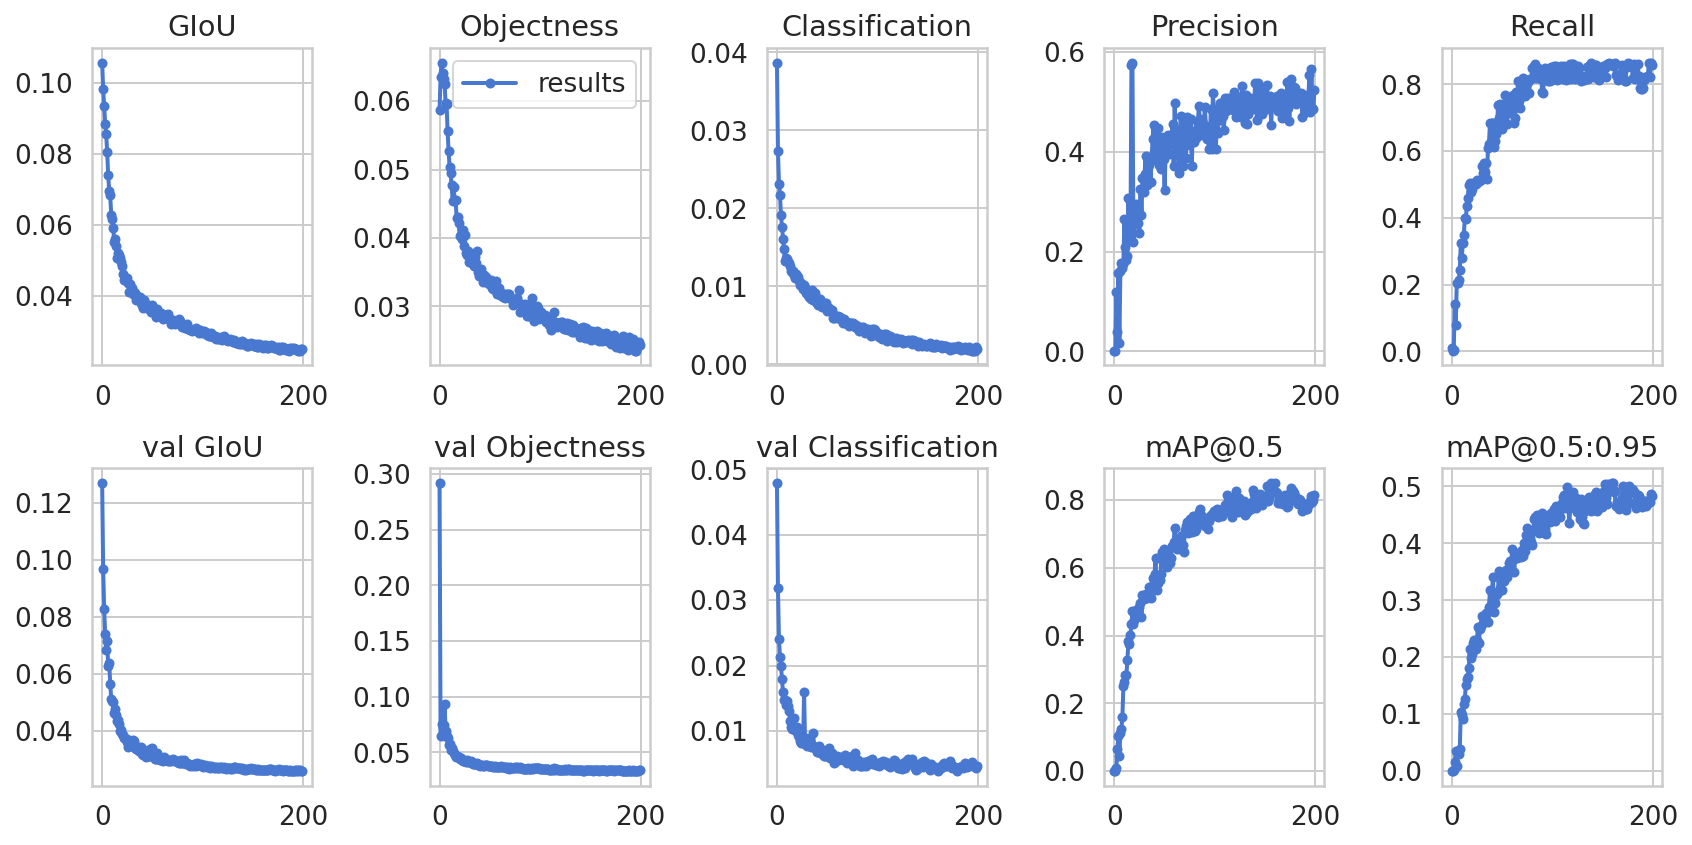

In [ ]:
from utils.utils import plot_results
plot_results();


In [ ]:
# get 20 from validation set to view the result
!find ../masks/images/val/ -maxdepth 1 -type f | head -20 | xargs cp -t "./inference/images/"
# detect is to "predict" the images 
!python detect.py --weights weights/best.pt \
  --img 400 --conf 0.4 --source ./inference/images/

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', fourcc='mp4v', img_size=416, iou_thres=0.5, output='inference/output', save_txt=False, source='./inference/images/', view_img=False, weights='weights/best.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

image 1/22 inference/images/17.jpeg: 416x352 1 with_masks, Done. (0.012s)
image 2/22 inference/images/18.jpeg: 224x416 2 with_masks, Done. (0.012s)
image 3/22 inference/images/23.jpeg: 288x416 1 with_masks, Done. (0.011s)
image 4/22 inference/images/25.jpeg: 224x416 5 without_masks, 1 with_masks, Done. (0.011s)
image 5/22 inference/images/30.jpeg: 416x352 1 with_masks, Done. (0.011s)
image 6/22 inference/images/35.jpeg: 288x416 1 without_masks, 3 with_masks, Done. (0.012s)
image 7/22 inference/images/36.jpeg: 288x416 6 with_masks, Done. (0.011s)
image 8/22 inference/images/44.jpeg: 352x416 8 with_masks, Done. (0.012s)
image 9/22 inference/images/45.jpeg: 288x416 2 

In [ ]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.cvtColor(cv2.imread(os.path.join(folder,filename)), cv2.COLOR_BGR2RGB)
        if img is not None:
            images.append(img)
    return images

images = load_images_from_folder('/content/yolov5/inference/output')
for i,img in enumerate(images):
    imgplot = plt.imshow(img)
    plt.show()
    



Output hidden; open in https://colab.research.google.com to view.